In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
img1 = cv2.imread("../Resources/Computer-Vision-with-Python/DATA/dog_backpack.png")
img2 = cv2.imread("../Resources/Computer-Vision-with-Python/DATA/watermark_no_copy.png")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

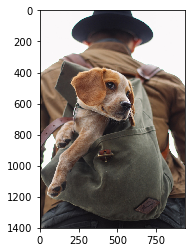

In [10]:
plt.imshow(img1)

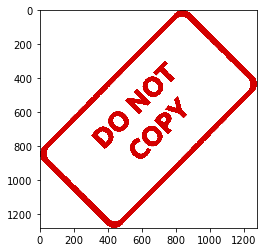

In [11]:
plt.imshow(img2)

The two images are not the same size. There are several approaches to solve this problem. Resizing but distorting image or masking

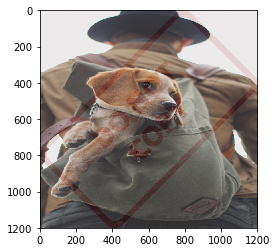

In [24]:
# Resizing
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

# Blending
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=10)
plt.imshow(blended)

In [29]:
# Overlay small image on top of larger image (non blending)
# numpy reassignemnt for the ROI (region of interest)

img1 = cv2.imread("../Resources/Computer-Vision-with-Python/DATA/dog_backpack.png")
img2 = cv2.imread("../Resources/Computer-Vision-with-Python/DATA/watermark_no_copy.png")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

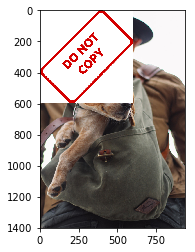

In [30]:
large_img = img1
small_img = cv2.resize(img2, (600,600))

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1] # Adding how long the small image is
y_end = y_offset + small_img.shape[0] # Adding how tall the small image is

large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img)

In [31]:
# Blending images of different sizes & masking

img1 = cv2.imread("../Resources/Computer-Vision-with-Python/DATA/dog_backpack.png")
img2 = cv2.imread("../Resources/Computer-Vision-with-Python/DATA/watermark_no_copy.png")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = cv2.resize(img2, (600,600))

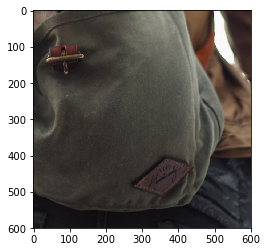

In [36]:
# Creating a ROI on the larger image
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]

# Tuple unpacking
rows, cols, channels = small_img.shape
roi = large_img[y_offset:large_img.shape[0], x_offset:large_img.shape[1]]

plt.imshow(roi)

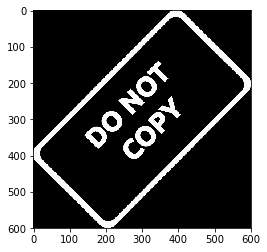

In [39]:
# Creating a mask of the smaller image
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(small_img_gray)
plt.imshow(mask_inv, cmap='gray')

In [44]:
# mask no longer contains color channels, we need to reshape it so that it is compatible with matrix operations
white_bg = np.full(small_img.shape, 255, dtype=np.uint8)
bg = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv) # white background with mask for all three color channels
bg.shape

(600, 600, 3)

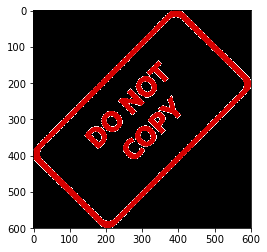

In [46]:
# use the mask to make anything in white in the original small image to shine through
fg = cv2.bitwise_or(small_img, small_img, mask=mask_inv)
plt.imshow(fg)

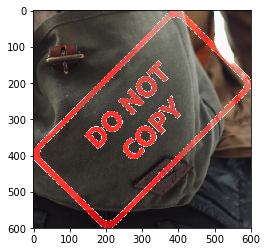

In [47]:
# Blend roi and mask
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

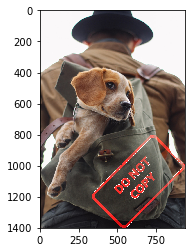

In [48]:
# overlay images on top of each other
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = final_roi
plt.imshow(large_img)